In [1]:
# import library
import pandas as pd
import numpy as np

In [2]:
df_diabetes = pd.read_csv("diabetes.csv")
df_diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [3]:
df_diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## **Pre-Processing Data**

In [4]:
# memeriksa jenis data setiap variabel
df_diabetes.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [5]:
# mengubah jenis data menjadi kategorikal pada variabel Outcome
df_diabetes["Outcome"] = df_diabetes["Outcome"].astype('category')

In [6]:
# periksa apakah jenis data variabel Outcome sudah berubah
df_diabetes["Outcome"].dtypes

CategoricalDtype(categories=[0, 1], ordered=False)

In [7]:
# memeriksa dimensi data
np.shape(df_diabetes)

(768, 9)

In [8]:
# memeriksa missing value setiap variabel
df_diabetes.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Outcome                     False
dtype: bool

In [9]:
# transforming variabel prediktor dengan metode MinMaxScaler
from sklearn import preprocessing
transformasi_min_max = preprocessing.MinMaxScaler()

In [10]:
# membagi data menjadi variabel target dan atribut
target = 'Outcome'
x = df_diabetes.drop('Outcome', axis=1)
y = df_diabetes[target]
nama_var_x = ['Pregnancies','Glucose','BloodPressure','SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
x = pd.DataFrame(data=transformasi_min_max.fit_transform(x), columns=nama_var_x)

In [11]:
x

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000
...,...,...,...,...,...,...,...,...
763,0.588235,0.507538,0.622951,0.484848,0.212766,0.490313,0.039710,0.700000
764,0.117647,0.613065,0.573770,0.272727,0.000000,0.548435,0.111870,0.100000
765,0.294118,0.608040,0.590164,0.232323,0.132388,0.390462,0.071307,0.150000
766,0.058824,0.633166,0.491803,0.000000,0.000000,0.448584,0.115713,0.433333


In [12]:
# membagi data menjadi data training dan data testing (75% Training dan 25% Testing)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=1)

## **Data Eksplorasi**

In [13]:
# melihat seberapa banyak nilai 1 dan 0 pada variabel Outcome
df_diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

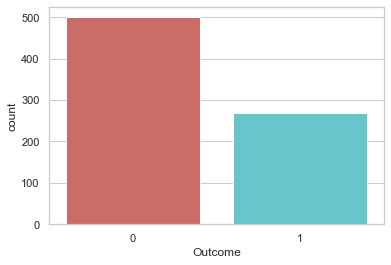

In [14]:
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
sns.countplot(x='Outcome',data=df_diabetes,palette='hls')
plt.savefig('count_plot')
plt.show()    

In [15]:
# membagi data menjadi data training dan data testing (80% Training dan 20% Testing)
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=1)

## **Regresi Logistik**

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression()

In [17]:
y_pred = logreg.predict(x_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(x_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.77


In [18]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[91  8]
 [27 28]]


In [19]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        99
           1       0.78      0.51      0.62        55

    accuracy                           0.77       154
   macro avg       0.77      0.71      0.73       154
weighted avg       0.77      0.77      0.76       154



## **Naive Bayes**

In [20]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()

# fit the model
gnb.fit(x_train, y_train)

GaussianNB()

In [21]:
y_pred = gnb.predict(x_test)

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        99
           1       0.71      0.62      0.66        55

    accuracy                           0.77       154
   macro avg       0.76      0.74      0.74       154
weighted avg       0.77      0.77      0.77       154



## **Decision Tree**

In [23]:
from sklearn.tree import DecisionTreeClassifier
# create decision tree classifer object
clf = DecisionTreeClassifier()

# train decision tree classifer
clf = clf.fit(x_train,y_train)

# predict the response for test dataset
y_pred = clf.predict(x_test)

In [24]:
# model accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7012987012987013


In [25]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.75      0.80      0.77        99
           1       0.59      0.53      0.56        55

    accuracy                           0.70       154
   macro avg       0.67      0.66      0.67       154
weighted avg       0.70      0.70      0.70       154

